# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


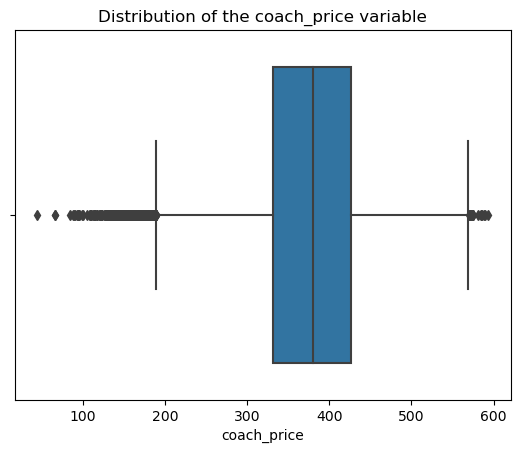

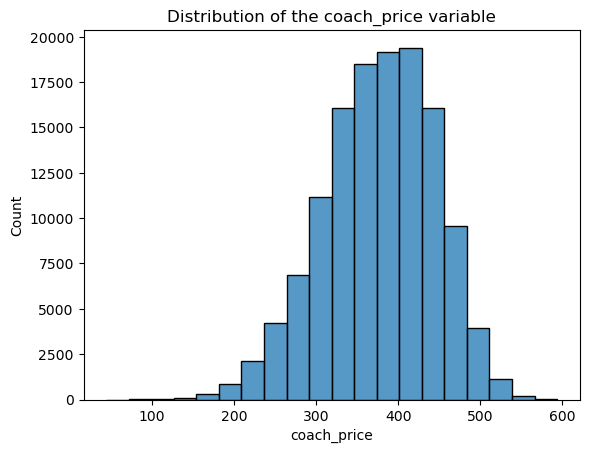

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64


<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
#using a boxplot with seaborn in order to see the distribution of the coach_price variable
sns.boxplot(x="coach_price", data=flight)
plt.title("Distribution of the coach_price variable")
plt.show()
plt.clf()

#using a histogram with seaborn in order to see the distribution of the coach_price variable
sns.histplot(flight.coach_price, bins=20)
plt.title("Distribution of the coach_price variable")
plt.show()
plt.clf()

#calculating the most common summary statisticsof the coach_price variable
print(flight["coach_price"].describe(include='all'))


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

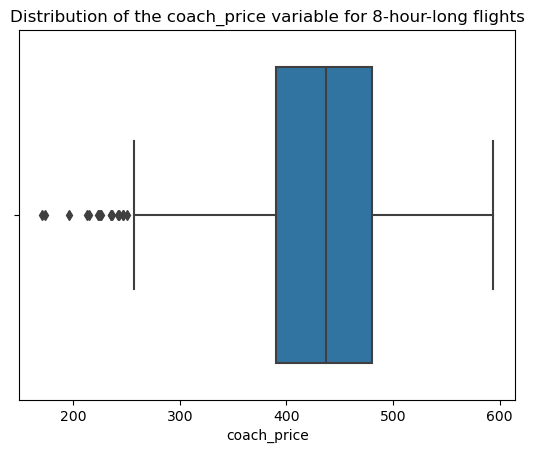

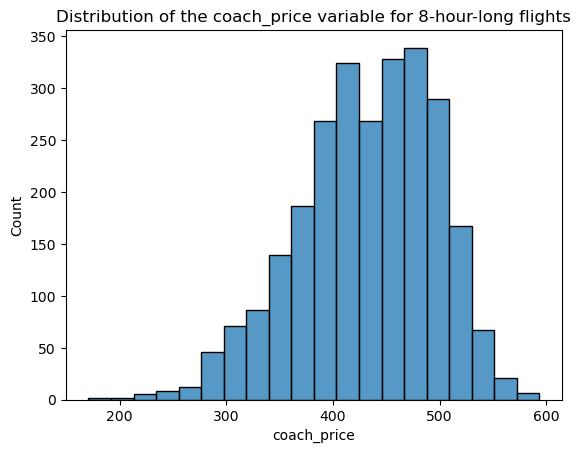

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64


The max value for a 8 hour long flight is 170.77.
The min value is 593.635 and the average price is 431.834377372817.
Since $500 is still far from the center of the distribution this would that a 500$ is still not that reasonable


<Figure size 640x480 with 0 Axes>

In [2]:
## Task 2
#using a boxplot with seaborn in order to see the distribution of the coach_price variable for 8-hour-long flights
flight_8_hour_long = flight[flight.hours == 8]
sns.boxplot(x="coach_price", data=flight_8_hour_long)
plt.title("Distribution of the coach_price variable for 8-hour-long flights")
plt.show()
plt.clf()

#using a histogram with seaborn in order to see the distribution of the coach_price variable for 8-hour-long flights
sns.histplot(flight.coach_price[flight.hours == 8], bins=20)
plt.title("Distribution of the coach_price variable for 8-hour-long flights")
plt.show()
plt.clf()

#calculating the most common summary statisticsof the coach_price variable for 8-hour-long flights
print(flight.coach_price[flight.hours == 8].describe(include='all'))

print("""

The max value for a 8 hour long flight is {}.
The min value is {} and the average price is {}.
Since $500 is still far from the center of the distribution this would that a 500$ is still not that reasonable""".format(flight_8_hour_long.coach_price.min(),flight_8_hour_long.coach_price.max(), flight_8_hour_long.coach_price.mean()))


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

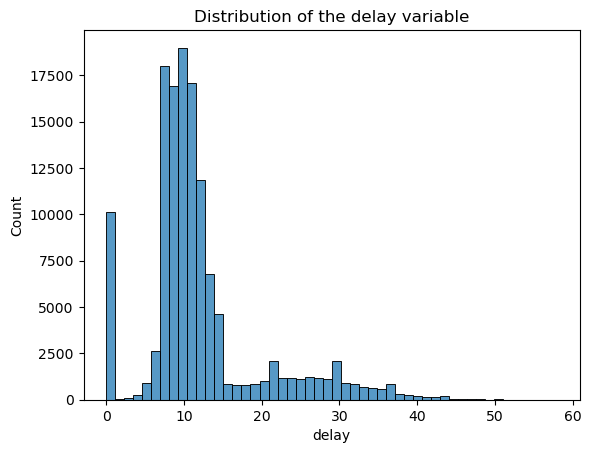

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


The average delay time is 13.16 min. Also looking at the histogram the majority of our data ranges from 0-20 min


<Figure size 640x480 with 0 Axes>

In [3]:
## Task 3
# using a histogram with seaborn in order to see the distribution of the delay variable

sns.histplot(flight.delay[flight.delay <= 100], bins=50)
plt.title("Distribution of the delay variable")
plt.show()
plt.clf()

#calculating the most common summary statistics of the delay variable
print(flight.delay.describe(include='all'))

print("""

The average delay time is {} min. Also looking at the histogram the majority of our data ranges from 0-20 min""".format(round(flight.delay.mean(),2)))


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

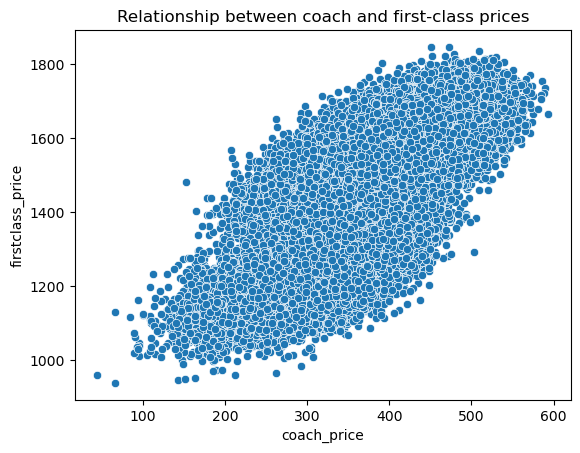



The relationship between the coach and first-class prices is positive. 
The expensier the coach prices are the first class prices get.

Since there are many data points in the scatterplot we can plot a LOWESS smoother over our data points.
This will draw a line through the approximate average price for each value of coach price in order to understand better the relationship


<Figure size 640x480 with 0 Axes>

In [4]:
## Task 4
# plotting a scatter plot to understandthe relationship between  coach and first-class prices
sns.scatterplot(x="coach_price", y="firstclass_price", data=flight)
plt.title("Relationship between coach and first-class prices")
plt.show()
plt.clf()


print("""

The relationship between the coach and first-class prices is positive. 
The expensier the coach prices are the first class prices get.

Since there are many data points in the scatterplot we can plot a LOWESS smoother over our data points.
This will draw a line through the approximate average price for each value of coach price in order to understand better the relationship""")

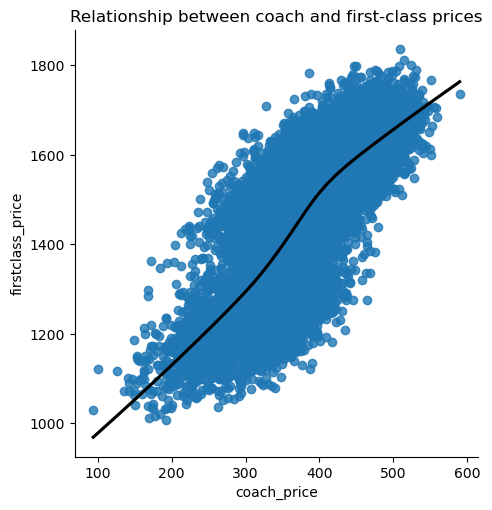

<Figure size 640x480 with 0 Axes>

In [5]:
# plotting a LOWESS smoother with a sample of 10% of our data points to understand the relationship between  coach and first-class prices
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))


sns.lmplot(x='coach_price', y='firstclass_price', data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.title("Relationship between coach and first-class prices")
plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

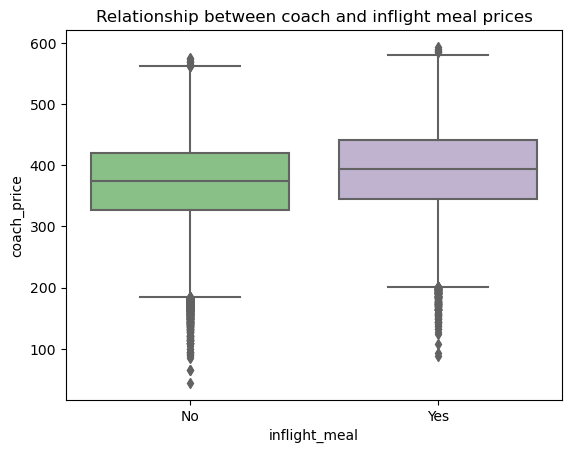

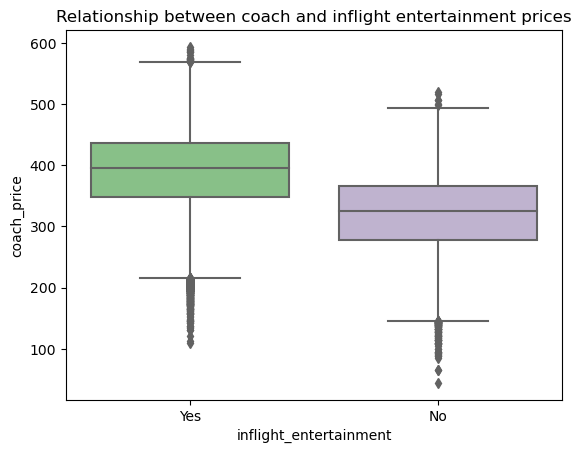

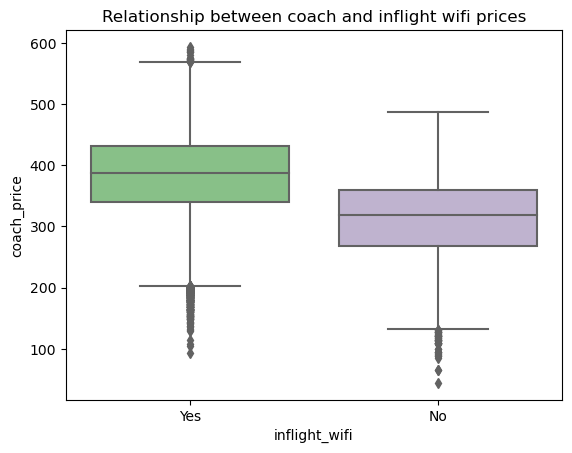



The relationship between coach prices and inflight shows a difference in the median and spread between the flights that have an inflight feature and those that do not.
Median prices and the pread of the data shows higher prices for flights with these inflight features.


<Figure size 640x480 with 0 Axes>

In [6]:
## Task 5
#plotting a boxplot to understand the relationship between coach prices and inflight features
sns.boxplot(data=flight, x='inflight_meal', y='coach_price', palette='Accent')
plt.title("Relationship between coach and inflight meal prices")
plt.show()
plt.clf()

sns.boxplot(data=flight, x='inflight_entertainment', y='coach_price', palette='Accent')
plt.title("Relationship between coach and inflight entertainment prices")
plt.show()
plt.clf()

sns.boxplot(data=flight, x='inflight_wifi', y='coach_price', palette='Accent')
plt.title("Relationship between coach and inflight wifi prices")
plt.show()
plt.clf()

print("""

The relationship between coach prices and inflight shows a difference in the median and spread between the flights that have an inflight feature and those that do not.
Median prices and the pread of the data shows higher prices for flights with these inflight features.""")

6. How does the number of passengers change in relation to the length of flights?

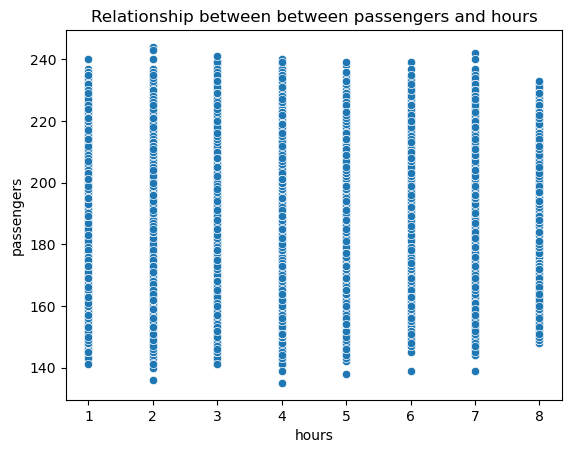

<Figure size 640x480 with 0 Axes>

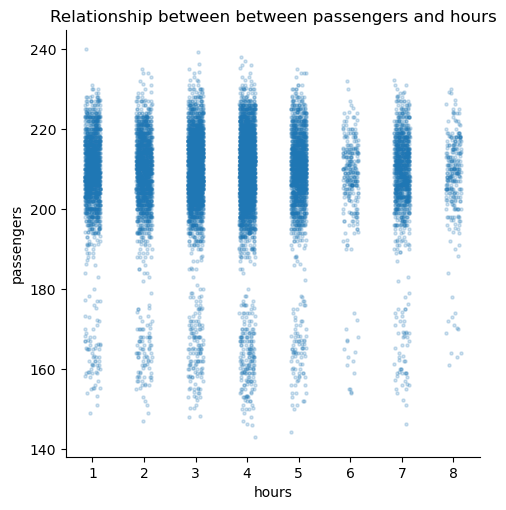

<Figure size 640x480 with 0 Axes>

In [7]:
## Task 6
#plotting a scatter plot to understandthe relationship between passengers and hours

sns.scatterplot(data=flight, x="hours", y="passengers")
plt.title("Relationship between between passengers and hours")
plt.show()
plt.clf()

#Adding a jitter in order to adjust the spread of points along either  axes in order to more easily see some many points there are in each group:
sns.lmplot(x='hours', y='passengers', data = flight_sub, x_jitter = .15, y_jitter = .15, fit_reg = False, scatter_kws={"s": 5, "alpha":0.2})
plt.title("Relationship between between passengers and hours")
plt.show()
plt.clf()



## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

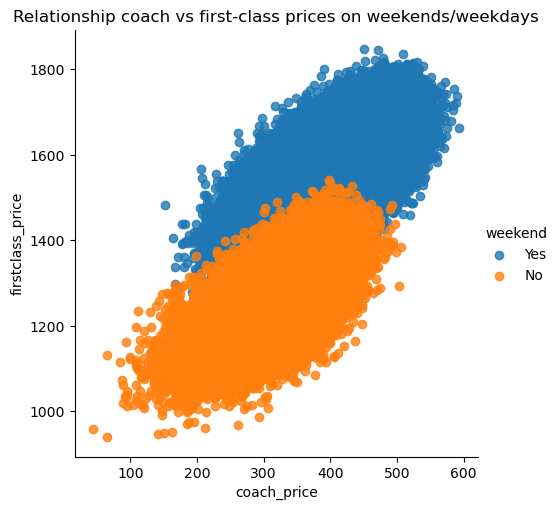



The relationship between ccoach and first-class prices on weekends compared to weekdays shows higher price in value for flights that are on the weekend than the ones that are not.


<Figure size 640x480 with 0 Axes>

In [8]:
## Task 7
#plotting a scatter plot to understand the relationship between coach and first-class prices on weekends compared to weekdays
sns.lmplot(x="coach_price", y="firstclass_price", data=flight, hue="weekend",fit_reg=False)
plt.title("Relationship coach vs first-class prices on weekends/weekdays")
plt.show()
plt.clf()

print("""

The relationship between ccoach and first-class prices on weekends compared to weekdays shows higher price in value for flights that are on the weekend than the ones that are not.""")

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

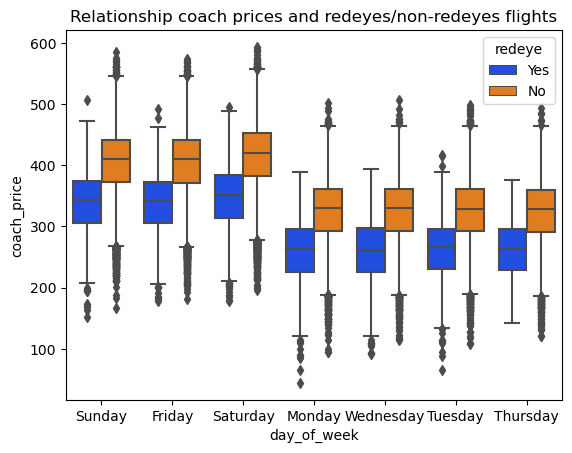



The boxplot makes us infer that flights that are redeye (overnight) have more accessible coach_prices.


<Figure size 640x480 with 0 Axes>

In [9]:
## Task 8
#plotting a box plot to understand the relationship between coach prices and redeyes and non-redeyes flights
sns.boxplot(x="day_of_week", y="coach_price", hue="redeye", data=flight,palette="bright")
plt.title("Relationship coach prices and redeyes/non-redeyes flights")
plt.show()
plt.clf()

print("""

The boxplot makes us infer that flights that are redeye (overnight) have more accessible coach_prices.""")
